Застосувати описані ввище методи кластеризації на *датесеті винних сортів UCI ML Wine Data Set*.

In [3]:
# імпортуємо необхідні бібліотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# завантажуємо набір даних про вино
wine_data = datasets.load_wine()

# створюємо Pandas DataFrame з даних про вино
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# виводимо перші 5 рядків DataFrame
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [4]:
# виводимо інформацію про DataFrame
print(wine_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
# перевіряємо чи є відсутні дані в DataFrame
print(wine_df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


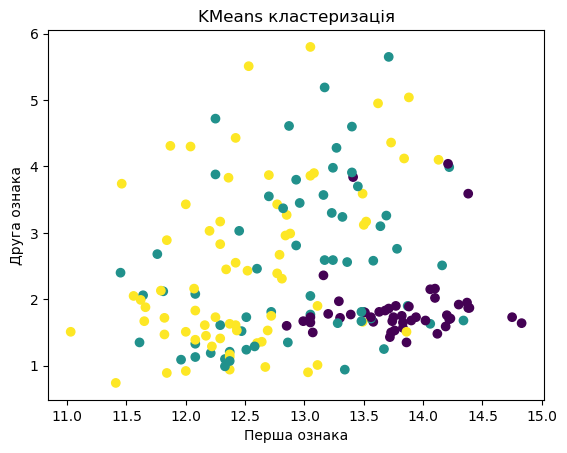

In [7]:
# KMeans кластеризація
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=10)
kmeans_model.fit(wine_df)
kmeans_prediction = kmeans_model.predict(wine_df)

# візуалізація KMeans кластерів
plt.scatter(wine_df.iloc[:, 0], wine_df.iloc[:, 1], c=kmeans_prediction)
plt.xlabel("Перша ознака")
plt.ylabel("Друга ознака")
plt.title('KMeans кластеризація')
plt.show()

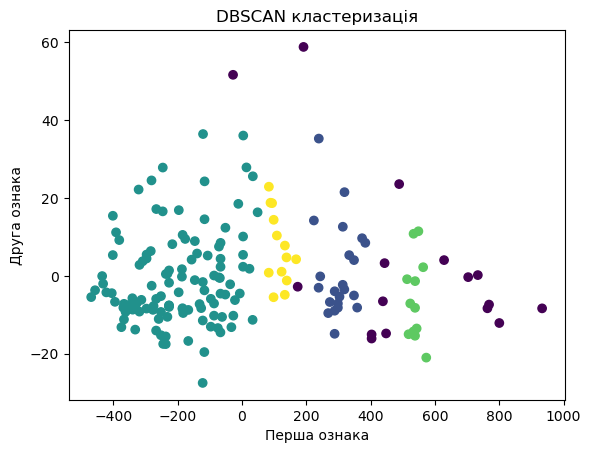

In [9]:
# DBSCAN кластеризація
dbscan_model = DBSCAN(eps=30, min_samples=4)
dbscan_model.fit(wine_df)
dbscan_prediction = dbscan_model.labels_

# візуалізація DBSCAN кластерів
pca = PCA(n_components=2).fit(wine_df)
pca_2d = pca.transform(wine_df)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=dbscan_prediction)
plt.xlabel("Перша ознака")
plt.ylabel("Друга ознака")
plt.title('DBSCAN кластеризація')
plt.show()


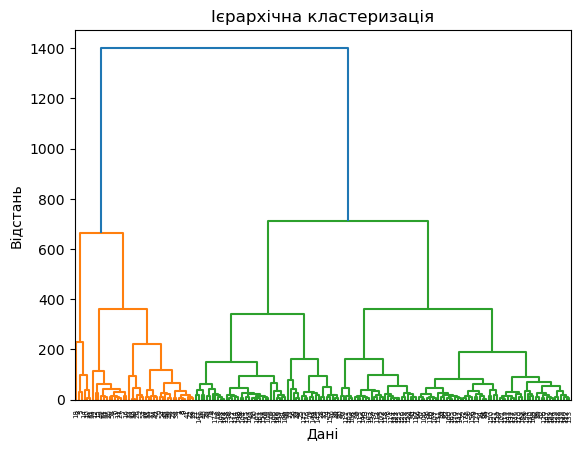

In [10]:
# ієрархічна кластеризація
hierarchy_method = linkage(wine_df, method='complete')
dendrogram(hierarchy_method, leaf_rotation=90)

plt.xlabel("Дані")
plt.ylabel("Відстань")
plt.title('Ієрархічна кластеризація')
plt.show()